In [168]:
# Standard Packages
import pandas as pd
import numpy as np

# Viz Packages
import seaborn as sns
import matplotlib.pyplot as plt

# Scipy Stats
import scipy.stats as stats 
from scipy.stats import pearsonr

# Statsmodel Api
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor


# SKLearn Modules
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

#Add Extra Modules
from math import sin, cos, sqrt, atan2
from datetime import datetime, timedelta
import cpi
import re



# Suppress future and deprecation warnings
import warnings
warnings.filterwarnings("ignore", category= FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 
pd.options.display.max_columns = None
pd.options.display.width = None

In [169]:
data = pd.read_csv("data/kc_house_data.csv")
df_school = pd.read_csv('data/AIM-EOC-MSP-SBA_Assessments_School__with_suppression_-_new_format__2017.csv')
crime = pd.read_csv('data/KCSO_Offense_Reports__2020_to_Present.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [170]:
crime.head()

,case_number,incident_datetime,nibrs_code,nibrs_code_name,block_address,city,state,zip,reporting_area,district,precinct,created_at,updated_at,hour_of_day,day_of_week,ID
0,C21034525,10/29/2021 11:21:00 AM,120,Robbery,14900 Block 4TH AVE SW,BURIEN,WA,98166,Reporting Area N05051,District N5,4.00,10/29/2021 03:04:35 PM,10/29/2021 03:39:50 PM,11,6,29495462116
1,C21034462,10/28/2021 08:10:00 PM,290,Destruction/Damage/Vandalism of Property,17600 Block 152ND PL SE,RENTON,WA,98058,Reporting Area F05007,District F5,3.00,10/29/2021 02:49:33 PM,10/29/2021 02:50:04 PM,20,5,29495152983
2,C21034548,10/29/2021 12:30:00 AM,240,Motor Vehicle Theft,100 Block SW 112TH ST,SEATTLE,WA,98146,Reporting Area K01012,District K1,4.00,10/29/2021 05:09:55 PM,10/29/2021 05:11:18 PM,0,6,29497952486
3,C21034576,10/28/2021 05:00:00 PM,13B,Simple Assault,14400 Block 162ND AVE SE,RENTON,WA,98059,Reporting Area F02003,District F2,3.00,10/29/2021 07:00:11 PM,10/29/2021 07:05:25 PM,17,5,29500173040
4,C22012227,04/12/2022 08:36:00 PM,13B,Simple Assault,2800 Block NE 200TH ST,SHORELINE,WA,98155,Reporting Area A05004,District A5,5.00,04/13/2022 06:35:07 AM,04/13/2022 06:36:30 AM,20,3,32749306796


In [171]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63618 entries, 0 to 63617
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   case_number        63618 non-null  object 
 1   incident_datetime  63618 non-null  object 
 2   nibrs_code         63618 non-null  object 
 3   nibrs_code_name    63618 non-null  object 
 4   block_address      60744 non-null  object 
 5   city               63578 non-null  object 
 6   state              63618 non-null  object 
 7   zip                62297 non-null  object 
 8   reporting_area     63266 non-null  object 
 9   district           63282 non-null  object 
 10  precinct           58782 non-null  float64
 11  created_at         63618 non-null  object 
 12  updated_at         63618 non-null  object 
 13  hour_of_day        63618 non-null  int64  
 14  day_of_week        63618 non-null  int64  
 15  ID                 63618 non-null  int64  
dtypes: float64(1), int64(3

In [172]:
crime.describe()

,precinct,hour_of_day,day_of_week,ID
count,"58,782.00","63,618.00","63,618.00","63,618.00"
mean,3.60,11.39,4.01,"22,755,270,067.18"
std,0.94,7.28,1.97,"9,062,387,724.26"
min,2.00,0.00,1.00,"12,135,373,288.00"
25%,3.00,5.00,2.00,"13,628,576,841.50"
50%,4.00,12.00,4.00,"20,589,127,658.00"
75%,4.00,17.00,6.00,"31,016,086,829.00"
max,5.00,23.00,7.00,"42,282,556,391.00"


In [173]:
def haversine(lat1, lon1, lat2, lon2):
    """
    Calculates the Haversine distance between two points on the Earth's surface.
    """
    R = 6371  # radius of Earth in km

    lat1, lon1, lat2, lon2 = map(np.deg2rad, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = R * c
    return d

urban_centers_dict = {
    "Mercer Island": (47.559367, -122.219335),
    "Magnolia": (47.651347, -122.404011),
    "Kirkland": (47.682111, -122.205549),
    "Somerset": (47.557850, -122.147104),
    "Beaver Lake": (47.590782, -121.998691),
    "Union Bay": (47.647763, -122.282622)
}

def closest_urban_center(row):
    lat1, lon1 = row['lat'], row['long']
    distances = [haversine(lat1, lon1, lat2, lon2) for lat2, lon2 in urban_centers_dict.values()]
    return min(distances)

data['distance'] = data.apply(closest_urban_center, axis=1)

In [174]:
# Define a dictionary with school district information
district_dict = {
    17001: ['Seattle', 47.604224, -122.310822],
    17210: ['Federal Way', 47.306740, -122.334571],
    17216: ['Enumclaw', 47.202359, -121.989672],
    17400: ['Mercer Island', 47.563806, -122.221739],
    17401: ['Highline', 47.503040, -122.333787],
    17402: ['Vashon Island', 47.415653, -122.465464],
    17403: ['Renton', 47.480680, -122.194300],
    17404: ['Skykomish', 47.709979, -121.358584],
    17405: ['Bellevue', 47.601939, -122.153399],
    17406: ['Tukwila', 47.465515, -122.264383],
    17408: ['Auburn', 47.298994, -122.209005],
    17409: ['Tahoma', 47.408238, -121.978171],
    17410: ['Snoqualmie Valley', 47.467175, -121.721867],
    17411: ['Issaquah', 47.541392, -122.042553],
    17412: ['Shoreline', 47.758887, -122.340132],
    17414: ['Lake Washington', 47.682244, -122.116046],
    17415: ['Kent', 47.370687, -122.179470],
    17417: ['Northshore', 47.768389, -122.152624],
    27417: ['Fife', 47.246443, -122.331492],
    17407: ['Riverview', 47.706997, -121.847689]
}

# Create a dataframe from the dictionary
df_school_district = pd.DataFrame.from_dict(district_dict, orient='index', columns=['district', 'lat', 'long'])
df_school_district.reset_index(inplace=True)
df_school_district.rename(columns={'index': 'DistrictCode'}, inplace=True)

In [175]:
df_school.dropna(subset=['countLevel4'], inplace=True)
grouped = df_school.groupby("DistrictCode")["PercentMetStandardIncludingPP"].mean()
grouped = grouped.reset_index()
df_school_district = df_school_district.merge(grouped, on="DistrictCode")
df_school_district = df_school_district.rename(columns={"PercentMetStandardIncludingPP": "average_grade"})

# Print the dataframe
df_school_district

,DistrictCode,district,lat,long,average_grade
0,17001,Seattle,47.60,-122.31,58.66
1,17210,Federal Way,47.31,-122.33,41.28
2,17216,Enumclaw,47.20,-121.99,58.12
3,17400,Mercer Island,47.56,-122.22,80.49
4,17401,Highline,47.50,-122.33,41.93
5,17402,Vashon Island,47.42,-122.47,43.45
6,17403,Renton,47.48,-122.19,49.05
7,17405,Bellevue,47.60,-122.15,67.68
8,17406,Tukwila,47.47,-122.26,38.71
9,17408,Auburn,47.30,-122.21,53.26


In [176]:
# Calculate haversine distances between all the points in the data DataFrame and the df_school_district DataFrame
distances = df_school_district.apply(lambda x: np.sqrt((data['lat'] - x['lat'])**2 + (data['long'] - x['long'])**2), axis=1)

# Find the index of the minimum value in each row
min_idx = distances.idxmin(axis=0)

# Look up the corresponding average_grade value in the df_school_district DataFrame
data = data.assign(school_grade=df_school_district.loc[min_idx, 'average_grade'].values)


Text(0.5, 1.0, "'Boxplot 'Waterfront' vs 'Price'")

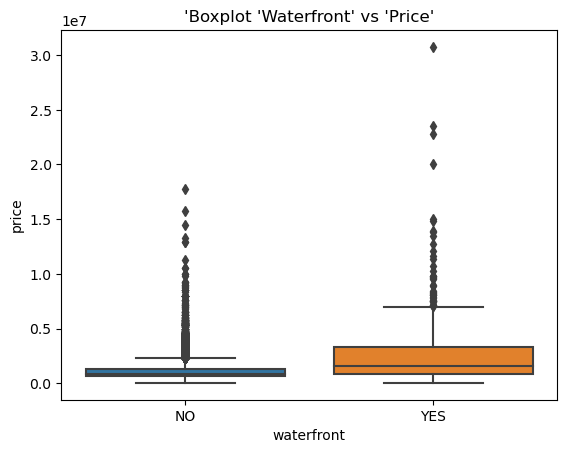

In [177]:
data['waterfront'] = data['waterfront'].astype('category')
sns.boxplot(x='waterfront', y='price', data=data)
plt.title("'Boxplot 'Waterfront' vs 'Price'")

In [178]:
X = data[['distance']]
Y = data['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.0009134322071686629

In [179]:
data = data[data['sqft_living'] <= 5000]
data = data[data['sqft_living'] >= 100]
data = data[data['distance'] <= 25]
data = data[data['price'] <= 2500000]

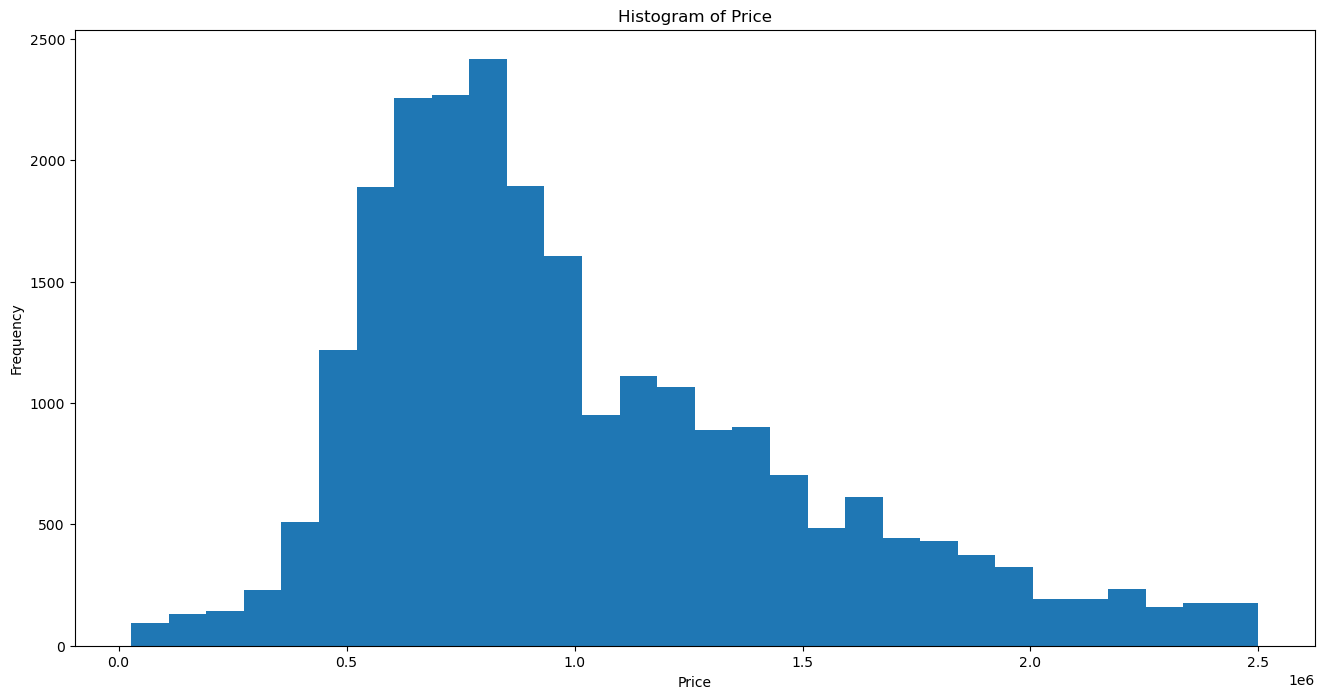

In [180]:
plt.figure(figsize=(16,8))
plt.hist(data['price'], bins=30)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')
plt.show()

Text(0.5, 1.0, "'Boxplot 'sqft_living' vs 'Price'")

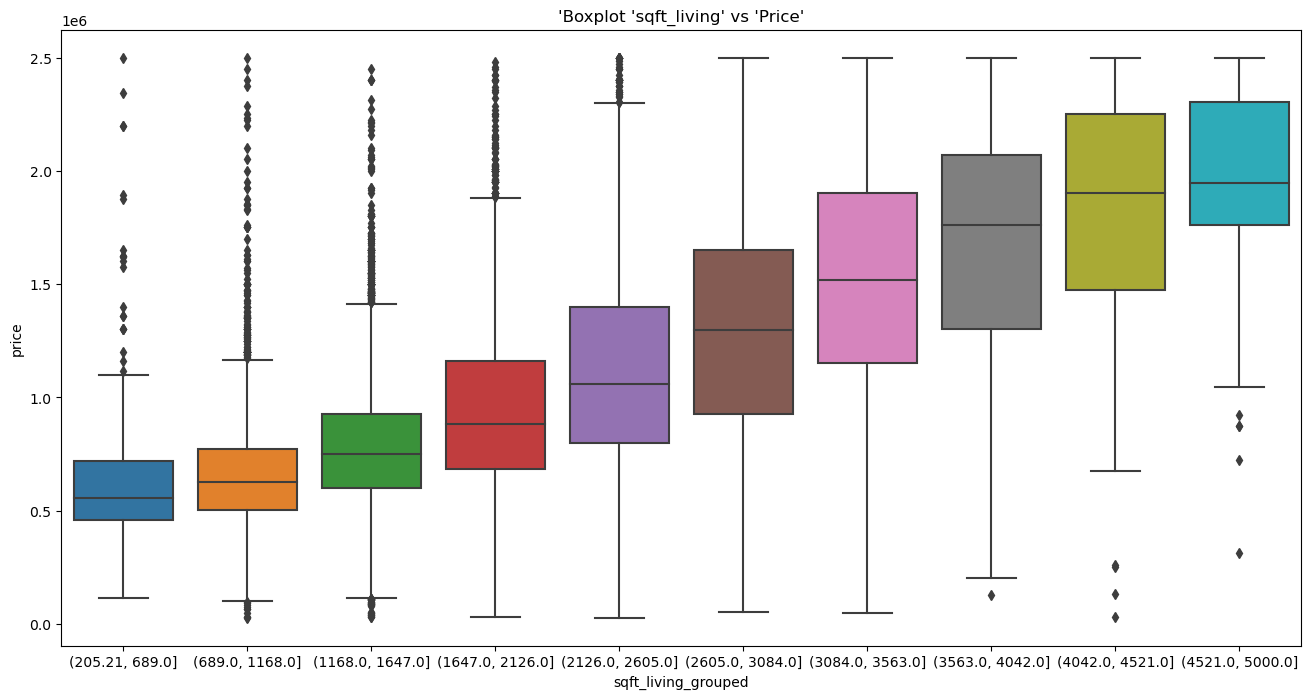

In [181]:
plt.figure(figsize=(16,8))
data['sqft_living_grouped'] = pd.cut(data['sqft_living'], bins=10)
sns.boxplot(x='sqft_living_grouped', y='price', data=data)
plt.title("'Boxplot 'sqft_living' vs 'Price'")

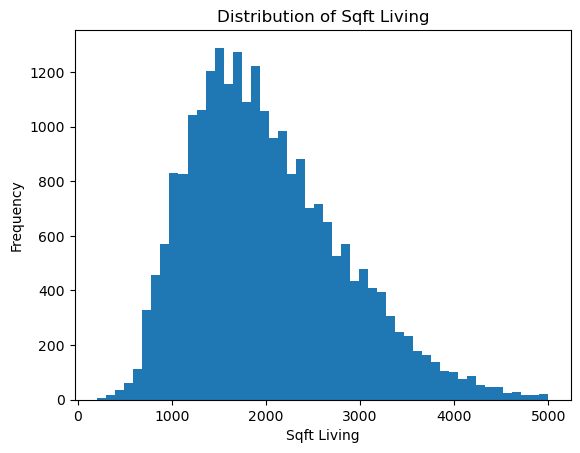

In [182]:
plt.hist(data['sqft_living'], bins=50)
plt.title("Distribution of Sqft Living")
plt.xlabel("Sqft Living")
plt.ylabel("Frequency")
plt.show()

c:\Users\cnade\anaconda3\envs\learn-env\lib\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


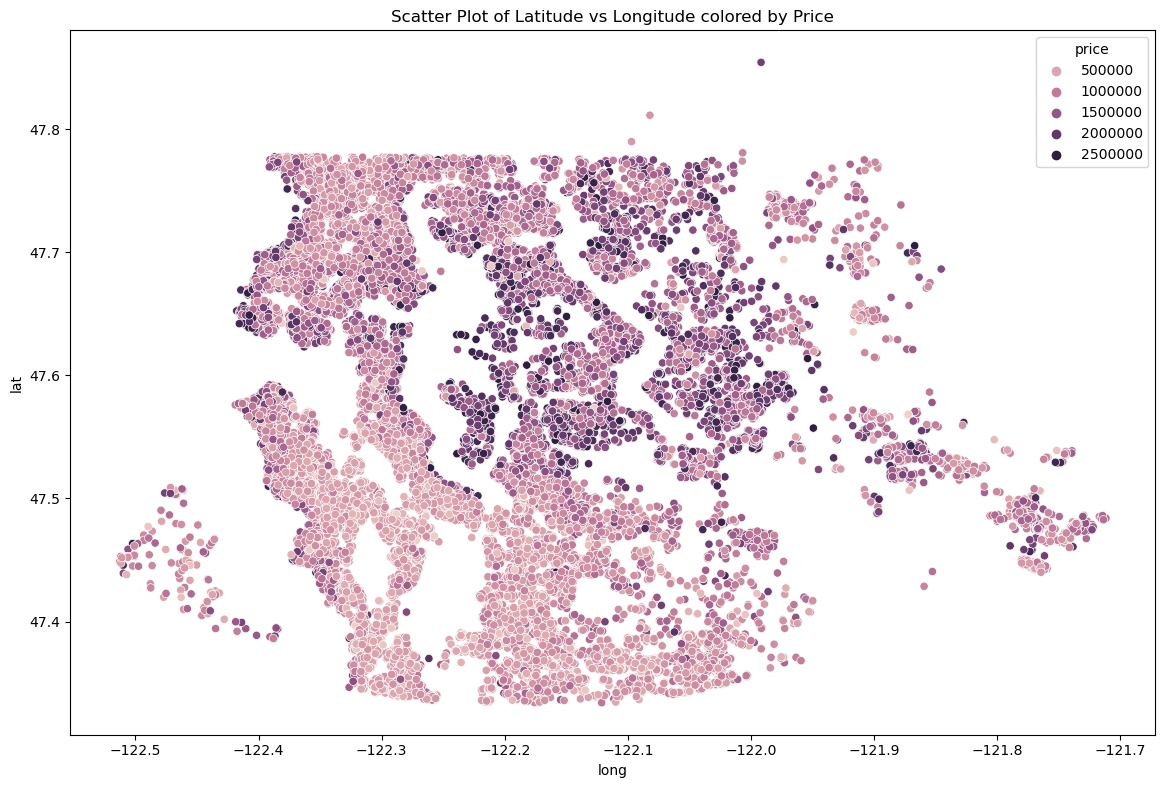

In [183]:
plt.figure(figsize=(14, 14))
ax = sns.scatterplot(x='long', y='lat', hue='price', data=data, cmap='plasma')
ax.set_aspect('equal')
plt.title("Scatter Plot of Latitude vs Longitude colored by Price")
plt.show()

In [184]:
data = data.dropna()
data['waterfront'] = data['waterfront'].apply(lambda x: 1 if x == 'YES' else 0)
data['greenbelt'] = data['greenbelt'].apply(lambda x: 1 if x == 'YES' else 0)
data['nuisance'] = data['nuisance'].apply(lambda x: 1 if x == 'YES' else 0)

In [185]:
data['grade'] = data['grade'].str.extract(r'(\d+)').astype(int)
data['grade'].unique()

array([ 7,  9,  8,  6, 10,  5,  4, 11,  3, 12])

In [186]:
condition_mapping = {'Very Good': 5, 'Good': 4, 'Average': 3, 'Fair': 2, 'Poor': 1}
data['condition'] = data['condition'].map(condition_mapping)
data['condition'].unique()

array([4, 3, 5, 2, 1], dtype=int64)

In [187]:
view_mapping = {'NONE': 1, 'FAIR': 2, 'AVERAGE': 3, 'GOOD': 4, 'EXCELLENT': 5}
data['view'] = data['view'].map(view_mapping)
data['view'].unique()
data['date'].max()

'9/9/2021'

In [188]:
data = data.drop(['heat_source'], axis=1)
data = data.drop(['sqft_living_grouped'], axis=1)


In [189]:
data['date'] = pd.to_datetime(data['date'])
data = data[data['date'] < '2022-01-01']
data['price'] = data.apply(lambda row: cpi.inflate(row['price'],row['date'].year), axis=1)


In [190]:
data['has_been_renovated'] = np.where(data['yr_renovated'] != 0, 1, 0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15474 entries, 1 to 30151
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  15474 non-null  int64         
 1   date                15474 non-null  datetime64[ns]
 2   price               15474 non-null  float64       
 3   bedrooms            15474 non-null  int64         
 4   bathrooms           15474 non-null  float64       
 5   sqft_living         15474 non-null  int64         
 6   sqft_lot            15474 non-null  int64         
 7   floors              15474 non-null  float64       
 8   waterfront          15474 non-null  category      
 9   greenbelt           15474 non-null  int64         
 10  nuisance            15474 non-null  int64         
 11  view                15474 non-null  int64         
 12  condition           15474 non-null  int64         
 13  grade               15474 non-null  int32     

In [108]:
data['zip_code'] = data['address'].str[-20:-15]

One Hot Encoding Zipcodes

In [109]:
# One hot encode categoricals
zipcode_ohe = pd.get_dummies(data['zip_code'], drop_first=True)

#Concatenate the new dataframe with X_third_train, call new train set with zipcodes X_third_train_zip
data = pd.concat([data, zipcode_ohe], axis=1)

data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,distance,school_grade,has_been_renovated,zip_code,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98050,98051,98052,98053,98055,98056,98057,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199,98272,98296
1,8910500230,2021-12-13,993625.124553,5,2.5,2770,6703,1.0,0,0,1,3,3,7,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.355910,7.598871,70.535746,0,98133,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1180000275,2021-09-29,335888.493191,6,2.0,2880,6156,1.0,0,0,0,3,3,7,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.225200,6.389107,49.046699,0,98178,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1604601802,2021-12-14,837021.164705,3,3.0,2160,1400,2.0,0,0,0,3,3,9,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.290200,5.369775,58.657228,0,98118,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8562780790,2021-08-24,639916.180758,2,2.0,1120,758,2.0,0,0,1,1,3,7,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.071880,6.312146,72.108463,0,98027,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2807100156,2021-07-20,675017.068310,2,1.0,1190,5688,1.0,0,0,1,1,3,7,PUBLIC,1190,0,300,0,1948,0,"1602 North 185th Street, Shoreline, Washington...",47.763470,-122.340155,13.351713,70.535746,0,98133,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Crime rate, lot size, and house density by zip code

In [110]:
# First, calculate the mean sqft_living for each zip code
zip_code_sqft_lot = data.groupby('zip_code')['sqft_lot'].mean()

# Next, divide the zip codes into sq_ft categories based on their mean sqft_living
zip_code_categories = pd.cut(zip_code_sqft_lot, bins=10, labels=False, retbins=False)

# Count the number of rows in the crime dataset grouped by zip code
zip_code_crime = crime.groupby('zip')['case_number'].count()
zip_code_count = data.groupby('zip_code')['zip_code'].count()

# Finally, add the price category as a new column to the train_data dataframe
data['zip_code_category'] = data['zip_code'].map(zip_code_categories)

# Map the bin to the corresponding zip code in data
data['zip_code_category_crime'] = (data['zip_code'].map(zip_code_crime) / data['zip_code'].map(zip_code_count))
data['zip_code_category_crime'].fillna(0, inplace=True)


data['has_basement'] = (data['sqft_basement'] > 0).astype(int)
data['has_patio'] = (data['sqft_patio'] > 0).astype(int)
data['sqft_garage'] = (data['sqft_garage'] > 0).astype(int)


In [111]:
zip_code_crime.sort_values(ascending=False)

zip
98168    4939
98188    4832
98166    4559
98133    4476
98146    3663
         ... 
98421       1
98225       1
98439       1
98206       1
90875       1
Name: case_number, Length: 184, dtype: int64

In [112]:
# Log transform the columns 'price', 'sqft_living', and 'sqft_lot'
data[['sqft_living', 'sqft_lot']] = np.log(data[['sqft_living', 'sqft_lot']])

# Normalize the columns 'price_log', 'sqft_living_log', and 'sqft_lot_log'
data[['sqft_living', 'sqft_lot']] = (data[['sqft_living', 'sqft_lot']] - data[['sqft_living', 'sqft_lot']].mean()) / data[['sqft_living', 'sqft_lot']].std()



In [113]:
'''
# define a function to standardize and log transform a column
def standardize(column, mu, sigma):
    return ((column - mu) / sigma)

# Log transform the columns 'sqft_living', and 'sqft_lot'
data[['sqft_living', 'sqft_lot']] = np.log(data[['sqft_living', 'sqft_lot']])

# group data by zip_code and compute mean and std for sqft_living and sqft_lot
grouped = data.groupby('zip_code')
mu = grouped[['sqft_living', 'sqft_lot']].transform('mean')
sigma = grouped[['sqft_living', 'sqft_lot']].transform('std').interpolate()

# replace the original data with standardized and log transformed values
data['sqft_living'] = standardize(data['sqft_living'], mu['sqft_living'], sigma['sqft_living'])
data['sqft_lot'] = standardize(data['sqft_lot'], mu['sqft_lot'], sigma['sqft_lot'])
'''

"\n# define a function to standardize and log transform a column\ndef standardize(column, mu, sigma):\n    return ((column - mu) / sigma)\n\n# Log transform the columns 'sqft_living', and 'sqft_lot'\ndata[['sqft_living', 'sqft_lot']] = np.log(data[['sqft_living', 'sqft_lot']])\n\n# group data by zip_code and compute mean and std for sqft_living and sqft_lot\ngrouped = data.groupby('zip_code')\nmu = grouped[['sqft_living', 'sqft_lot']].transform('mean')\nsigma = grouped[['sqft_living', 'sqft_lot']].transform('std').interpolate()\n\n# replace the original data with standardized and log transformed values\ndata['sqft_living'] = standardize(data['sqft_living'], mu['sqft_living'], sigma['sqft_living'])\ndata['sqft_lot'] = standardize(data['sqft_lot'], mu['sqft_lot'], sigma['sqft_lot'])\n"

In [114]:
data[data['zip_code'] == '98133']

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,distance,school_grade,has_been_renovated,zip_code,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98050,98051,98052,98053,98055,98056,98057,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199,98272,98296,zip_code_category,zip_code_category_crime,has_basement,has_patio
1,8910500230,2021-12-13,9.936251e+05,5,2.5,0.918785,-0.076671,1.0,0,0,1,3,3,7,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.355910,7.598871,70.535746,0,98133,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.682578,1,1
5,2807100156,2021-07-20,6.750171e+05,2,1.0,-1.118218,-0.250982,1.0,0,0,1,1,3,7,PUBLIC,1190,0,1,0,1948,0,"1602 North 185th Street, Shoreline, Washington...",47.763470,-122.340155,13.351713,70.535746,0,98133,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.682578,0,0
31,6450304798,2021-08-20,7.884199e+05,3,2.0,-0.450088,-1.917117,3.0,0,0,0,1,3,8,PUBLIC,1480,340,1,30,2021,0,"14011 Lenora Place North, Seattle, Washington ...",47.730855,-122.343575,9.930943,70.535746,0,98133,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.682578,1,1
34,5727500011,2021-11-03,8.478214e+05,3,2.0,-0.814073,0.021728,1.0,0,0,1,1,5,7,PUBLIC,1350,0,1,120,1985,0,"16710 Meridian Avenue North, Shoreline, Washin...",47.751020,-122.334470,12.119559,70.535746,0,98133,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.682578,0,1
54,2683100015,2021-09-10,9.018228e+05,4,1.5,0.812010,0.128093,1.5,0,0,0,1,3,7,PUBLIC,1470,1230,1,0,1955,0,"2147 North 114th Street, Seattle, Washington 9...",47.711140,-122.332090,7.961055,70.535746,0,98133,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.682578,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29903,9438400050,2021-09-22,8.534916e+05,6,3.0,0.671526,0.133694,1.0,0,0,0,1,4,7,PUBLIC,1280,1220,0,110,1960,0,"2147 North 158th Street, Shoreline, Washington...",47.743490,-122.332610,11.282679,70.535746,0,98133,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.682578,1,1
29963,5562100370,2021-12-20,6.372161e+05,4,1.5,-0.560053,0.139007,1.5,0,0,0,1,4,7,PUBLIC,1500,0,0,200,1950,0,"15743 Ashworth Avenue North, Shoreline, Washin...",47.744550,-122.340340,11.406661,70.535746,0,98133,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.682578,0,1
29969,3705900016,2021-11-12,8.262209e+05,3,2.0,-0.120483,0.236149,1.0,0,0,1,1,4,7,PUBLIC,1300,1300,1,100,1957,0,"1831 North 185th Street, Shoreline, Washington...",47.763050,-122.336220,13.286944,70.535746,0,98133,0,0,0,0,0,0,0,0,0,0,0,0

In [115]:
data.drop(['zip_code'], axis=1, inplace=True)

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15474 entries, 1 to 30151
Columns: 103 entries, id to has_patio
dtypes: category(1), datetime64[ns](1), float64(10), int32(5), int64(12), object(2), uint8(72)
memory usage: 4.4+ MB


In [117]:
X = data[['distance','school_grade','zip_code_category','zip_code_category_crime','grade','sqft_living','waterfront','condition','view']]
y = data['price']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     3099.
Date:                Thu, 16 Feb 2023   Prob (F-statistic):               0.00
Time:                        09:58:16   Log-Likelihood:            -2.1703e+05
No. Observations:               15474   AIC:                         4.341e+05
Df Residuals:                   15464   BIC:                         4.342e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -4

In [118]:
train_data, test_data, train_labels, test_labels = train_test_split(data.drop(columns=["id", "address", "lat", "long","sewer_system",'sqft_above','sqft_basement','sqft_patio','sqft_garage','sqft_lot']), data["price"], test_size=0.33, random_state=42)

In [119]:

non_zip_vars = ['price','bedrooms','bathrooms','sqft_living','floors','waterfront','greenbelt',
            'nuisance','view','condition','grade','distance','school_grade','has_been_renovated']
train_data.head()

,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,greenbelt,nuisance,view,condition,grade,yr_built,yr_renovated,distance,school_grade,has_been_renovated,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98050,98051,98052,98053,98055,98056,98057,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199,98272,98296,zip_code_category,zip_code_category_crime,has_basement,has_patio
15204,2021-10-08,2.322059e+06,4,2.5,0.970451,2.0,0,0,0,1,5,8,1995,0,1.423020,58.657228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.254808,0,1
6079,2021-10-25,7.014777e+05,3,3.0,-0.726392,2.0,0,0,0,1,3,8,2004,0,9.919477,58.657228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.618881,1,1
11382,2021-11-19,9.018228e+05,3,2.0,-0.592415,1.0,0,0,0,1,3,7,1954,0,8.980873,67.103517,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.229299,0,0
28367,2021-09-01,1.215031e+06,4,2.5,0.728705,1.0,0,0,0,1,3,8,1978,0,8.986523,67.103517,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,10.565022,1,1
25870,2021-06-17,1.144829e+06,3,2.0,0.109305,1.0,0,0,0,1,4,8,1949,0,6.044168,70.535746,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.044211,1,0


In [120]:

train_data['yr_renovated'] = np.where(train_data['yr_renovated'] == 0, train_data['yr_built'], train_data['yr_renovated'])
train_data['date'] = pd.to_datetime(train_data['date'])
train_data['year'] = train_data['date'].dt.year
train_data['years_since_build_or_renov'] = train_data['year'] - train_data[['yr_built', 'yr_renovated']].min(axis=1)
train_data.drop(['date', 'year', 'yr_built', 'yr_renovated'], axis=1, inplace=True)

test_data['yr_renovated'] = np.where(test_data['yr_renovated'] == 0, test_data['yr_built'], test_data['yr_renovated'])
test_data['date'] = pd.to_datetime(test_data['date'])
test_data['year'] = test_data['date'].dt.year
test_data['years_since_build_or_renov'] = test_data['year'] - test_data[['yr_built', 'yr_renovated']].min(axis=1)
test_data.drop(['date', 'year', 'yr_built', 'yr_renovated'], axis=1, inplace=True)


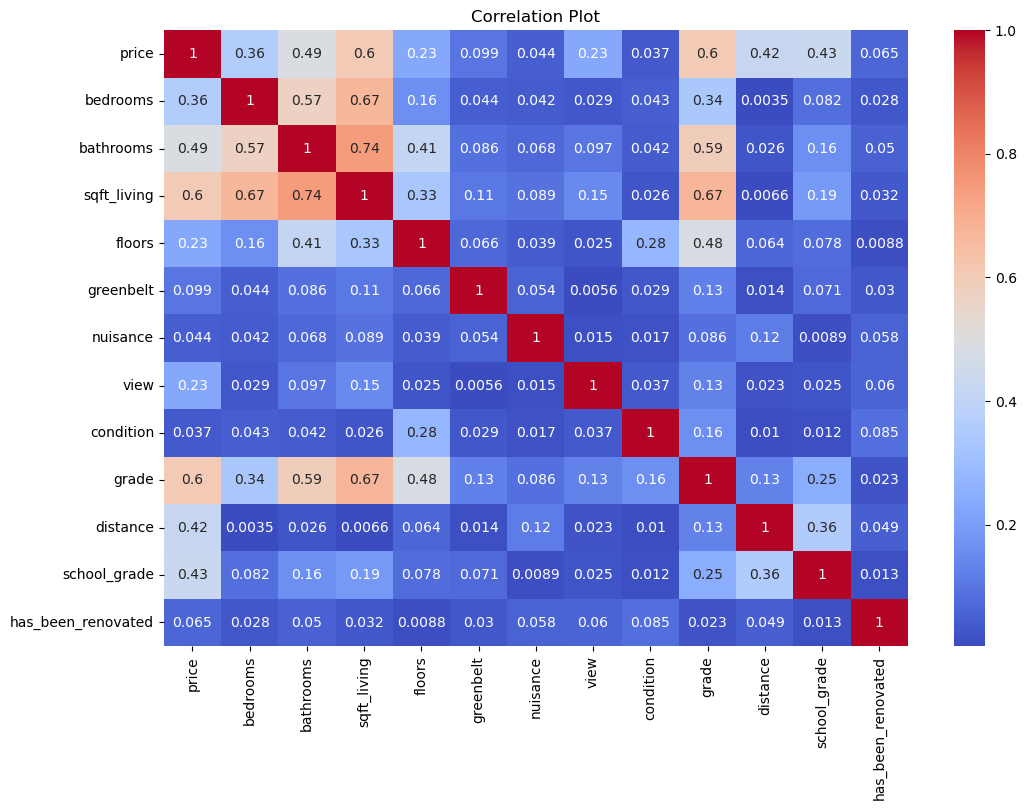

In [121]:
# Calculate the correlation matrix
corr = abs(train_data[non_zip_vars].corr())

# Plot the correlation matrix using seaborn
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Add a title to the plot
plt.title("Correlation Plot")

# Show the plot
plt.show()

In [122]:
X = train_data.drop(['price'], axis=1)
y = train_data['price']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     292.3
Date:                Thu, 16 Feb 2023   Prob (F-statistic):               0.00
Time:                        09:58:17   Log-Likelihood:            -1.4431e+05
No. Observations:               10367   AIC:                         2.888e+05
Df Residuals:                   10279   BIC:                         2.894e+05
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [123]:
train_data.drop(['bathrooms'], axis=1, inplace=True)

test_data.drop(['bathrooms'], axis=1, inplace=True)

In [124]:
X = train_data.drop(['price'], axis=1)
y = train_data['price']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     292.5
Date:                Thu, 16 Feb 2023   Prob (F-statistic):               0.00
Time:                        09:58:17   Log-Likelihood:            -1.4435e+05
No. Observations:               10367   AIC:                         2.889e+05
Df Residuals:                   10280   BIC:                         2.895e+05
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [125]:
non_zip_vars = non_zip_vars = ['price','bedrooms','sqft_living','floors','waterfront','greenbelt',
            'nuisance','view','condition','grade','distance','school_grade','has_been_renovated']
vif = [variance_inflation_factor(train_data[non_zip_vars].values, i) for i in range(train_data[non_zip_vars].shape[1])]
vif_df = pd.DataFrame({'Features': train_data[non_zip_vars].columns, 'VIF': vif})
vif_df.sort_values('VIF', ascending=False)

,Features,VIF
9,grade,72.423408
11,school_grade,31.713659
8,condition,22.857971
1,bedrooms,20.456469
0,price,15.284660
3,floors,11.783013
10,distance,4.593868
7,view,4.318451
2,sqft_living,2.189869
6,nuisance,1.258172


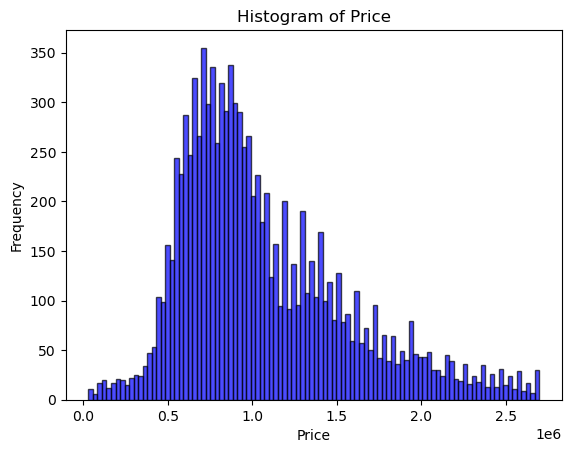

In [126]:
plt.hist(train_data['price'], bins=100, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')
plt.show()


In [127]:
X = train_data.drop(['price'], axis=1)
y = train_data['price']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     292.5
Date:                Thu, 16 Feb 2023   Prob (F-statistic):               0.00
Time:                        09:58:18   Log-Likelihood:            -1.4435e+05
No. Observations:               10367   AIC:                         2.889e+05
Df Residuals:                   10280   BIC:                         2.895e+05
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

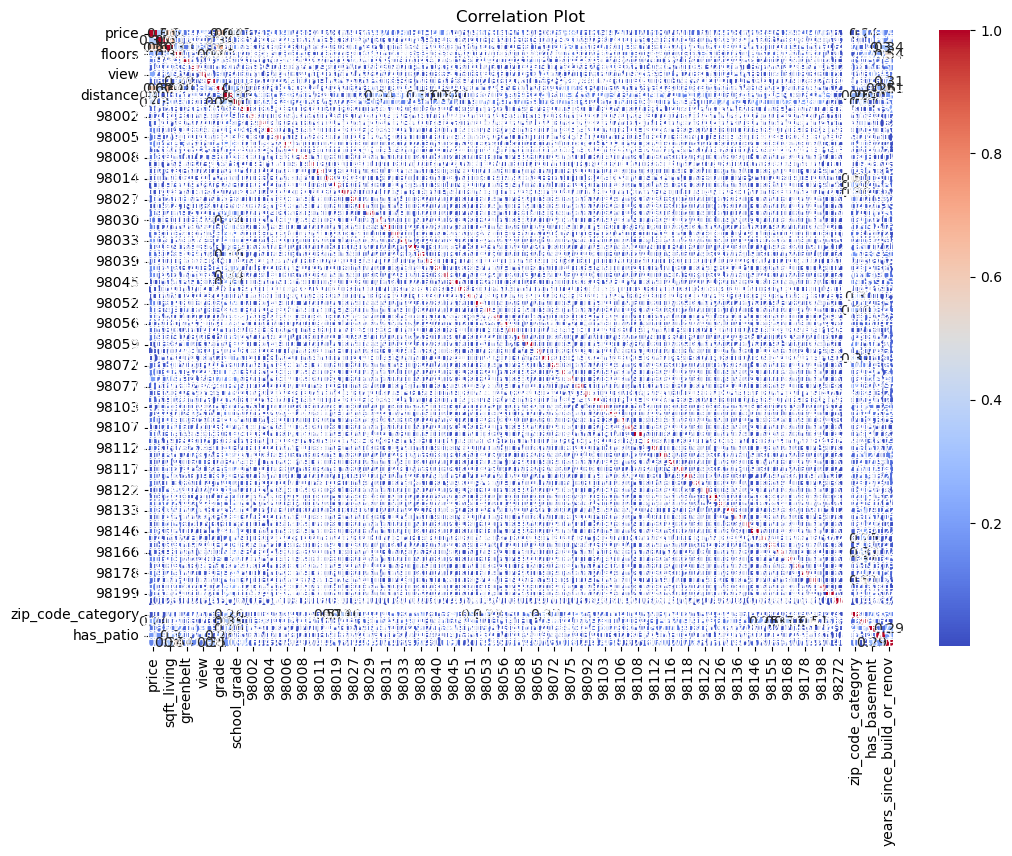

In [128]:
# Calculate the correlation matrix
corr = abs(train_data.corr())

# Plot the correlation matrix using seaborn
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Add a title to the plot
plt.title("Correlation Plot")

# Show the plot
plt.show()

In [129]:
X = train_data.drop(['price'], axis=1)
y = train_data['price']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     292.5
Date:                Thu, 16 Feb 2023   Prob (F-statistic):               0.00
Time:                        09:58:36   Log-Likelihood:            -1.4435e+05
No. Observations:               10367   AIC:                         2.889e+05
Df Residuals:                   10280   BIC:                         2.895e+05
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [130]:
train_data.drop(["has_patio"], axis=1, inplace=True)
test_data.drop(["has_patio"], axis=1, inplace=True)

#train_data.drop(["floors"], axis=1, inplace=True)
#test_data.drop(["floors"], axis=1, inplace=True)

train_data.drop(["nuisance"], axis=1, inplace=True)
test_data.drop(["nuisance"], axis=1, inplace=True)

train_data.drop(["greenbelt"], axis=1, inplace=True)
test_data.drop(["greenbelt"], axis=1, inplace=True)

#train_data.drop(["condition"], axis=1, inplace=True)
#test_data.drop(["condition"], axis=1, inplace=True)

#train_data.drop(["sqft_living"], axis=1, inplace=True)
#test_data.drop(["sqft_living"], axis=1, inplace=True)

                   

In [131]:
train_data[['distance', 'years_since_build_or_renov', 'school_grade']] = (train_data[['distance', 'years_since_build_or_renov', 'school_grade']] - train_data[['distance', 'years_since_build_or_renov', 'school_grade']].mean()) / train_data[[ 'distance', 'years_since_build_or_renov', 'school_grade']].std()

test_data[['distance', 'years_since_build_or_renov', 'school_grade']] = (test_data[['distance', 'years_since_build_or_renov', 'school_grade']] - test_data[['distance', 'years_since_build_or_renov', 'school_grade']].mean()) / test_data[[ 'distance', 'years_since_build_or_renov', 'school_grade']].std()

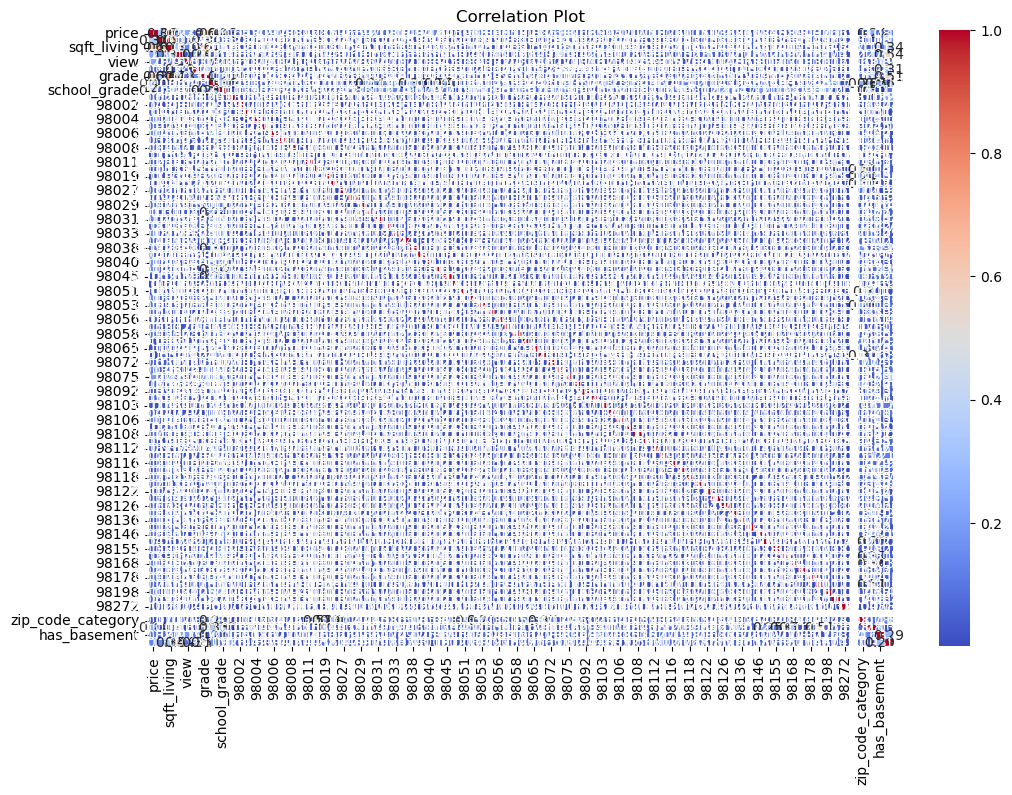

In [132]:
# Calculate the correlation matrix
corr = abs(train_data.corr())

# Plot the correlation matrix using seaborn
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Add a title to the plot
plt.title("Correlation Plot")

# Show the plot
plt.show()

In [133]:
X = train_data[['distance','school_grade','zip_code_category','zip_code_category_crime','grade','sqft_living','waterfront','condition','view','has_been_renovated','floors']]
y = train_data['price']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     1686.
Date:                Thu, 16 Feb 2023   Prob (F-statistic):               0.00
Time:                        09:58:50   Log-Likelihood:            -1.4545e+05
No. Observations:               10367   AIC:                         2.909e+05
Df Residuals:                   10355   BIC:                         2.910e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -2

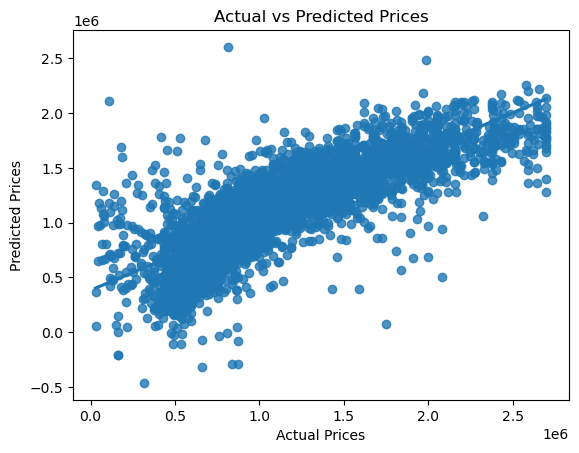

In [134]:
# Fit the model to the training data
#model = sm.OLS(train_data['price'], train_data.drop(['price'], axis=1))
#results = model.fit()

# Use the fitted model to make predictions on the test data
X_test = sm.add_constant(test_data[['distance','school_grade','zip_code_category','zip_code_category_crime','grade','sqft_living','waterfront','condition','view','has_been_renovated','floors']])
predictions = model.predict(X_test)
# Compare the predicted values with the actual prices in the test data
sns.regplot(x=test_data['price'], y=predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

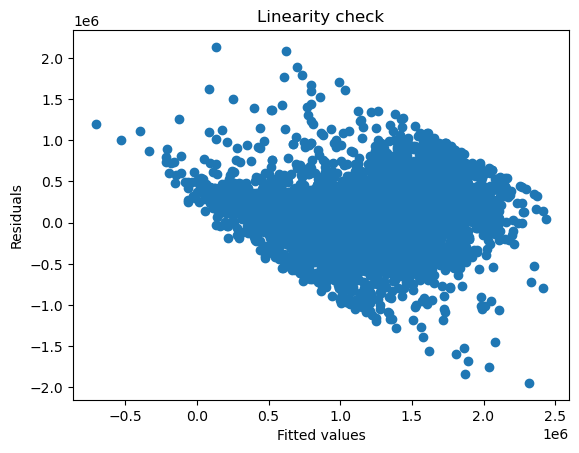

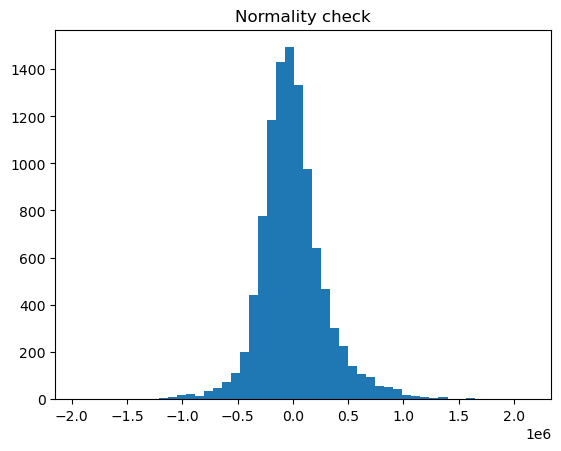

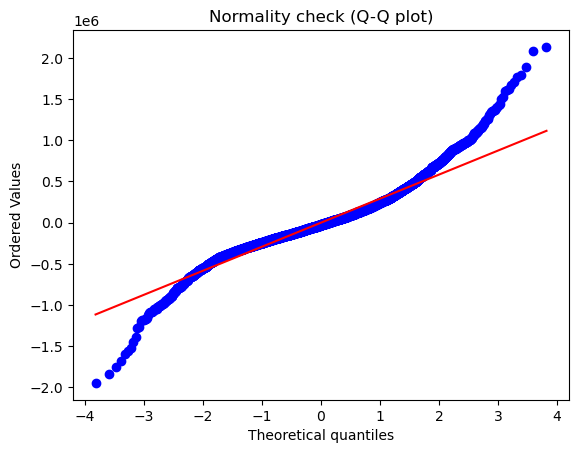

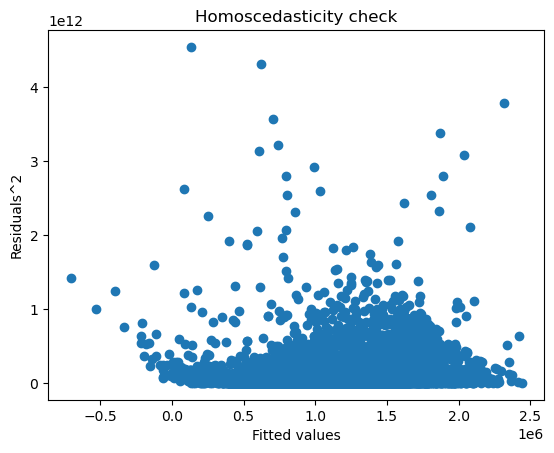

In [135]:
# calculate the residuals
residuals = model.resid

# Plot the residuals against the fitted values to check for linearity
plt.scatter(model.fittedvalues, residuals)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Linearity check")
plt.show()

# Plot a histogram of the residuals to check for normality
plt.hist(residuals, bins=50)
plt.title("Normality check")
plt.show()

# Plot a Q-Q plot of the residuals to check for normality

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normality check (Q-Q plot)")
plt.show()

# Plot the residuals against the fitted values to check for homoscedasticity
plt.scatter(model.fittedvalues, residuals**2)
plt.xlabel("Fitted values")
plt.ylabel("Residuals^2")
plt.title("Homoscedasticity check")

plt.show()

In [136]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(test_data['price'], predictions))

# Calculate the MAE
mae = mean_absolute_error(test_data['price'], predictions)

r2 = r2_score(test_data['price'], predictions)


print("RMSE:", rmse)
print("MAE:", mae)
print('R-squared score:', r2)

RMSE: 291968.39426240517
MAE: 212025.36865324294
R-squared score: 0.6556052762250553


In [137]:
pd.options.display.float_format = '{:,.2f}'.format
test_data['id'] = test_data.index
difference = pd.DataFrame({'id': test_data['id'], 'difference': test_data['price'] - predictions})
index_of_largest_difference = difference['difference'].idxmax()
print("Record with the largest difference:")
print(test_data.loc[index_of_largest_difference])
print("Predicted price:", predictions[index_of_largest_difference])

Record with the largest difference:
price                        1,749,644.24
bedrooms                             1.00
sqft_living                         -3.41
floors                               1.00
waterfront                           0.00
                                 ...     
zip_code_category                    0.00
zip_code_category_crime              8.02
has_basement                         0.00
years_since_build_or_renov           0.77
id                               7,947.00
Name: 7947, Length: 88, dtype: float64
Predicted price: 74823.68474332872


In [138]:
data[data['price'] == 1620000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,distance,school_grade,has_been_renovated,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98050,98051,98052,98053,98055,98056,98057,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199,98272,98296,zip_code_category,zip_code_category_crime,has_basement,has_patio


In [143]:
crime['incident_datetime'].sort_values().head(40)

43941    01/01/1972 12:00:00 AM
15953    01/01/1980 12:00:00 AM
43414    01/01/1992 05:35:00 PM
36751    01/01/1995 12:00:00 PM
16039    01/01/2000 12:00:00 AM
16616    01/01/2000 12:00:00 AM
36046    01/01/2001 12:00:00 AM
20059    01/01/2002 12:01:00 AM
45946    01/01/2004 12:00:00 AM
16431    01/01/2005 12:00:00 AM
40848    01/01/2007 12:00:00 AM
39444    01/01/2007 12:00:00 AM
43962    01/01/2007 12:00:00 AM
21391    01/01/2007 12:00:00 AM
20666    01/01/2007 12:00:00 AM
44025    01/01/2008 12:01:00 AM
34684    01/01/2009 08:00:00 AM
3452     01/01/2009 12:00:00 AM
3703     01/01/2009 12:00:00 AM
17536    01/01/2009 12:01:00 AM
52847    01/01/2010 09:42:00 AM
3717     01/01/2011 12:00:00 AM
27856    01/01/2012 09:00:00 AM
22044    01/01/2012 12:00:00 AM
3901     01/01/2012 12:00:00 AM
20546    01/01/2012 12:00:00 PM
3188     01/01/2012 12:01:00 AM
31136    01/01/2013 01:05:00 PM
39830    01/01/2013 12:00:00 AM
42021    01/01/2013 12:01:00 AM
46868    01/01/2014 01:03:00 PM
19004   